In [ ]:
  import os
from google.colab import drive
 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/tinkerhub/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/tinkerhub


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['chakka', 'manga']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('train')
val = get_data('test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


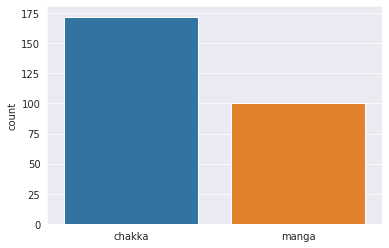

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("chakka")
    else:
        l.append("manga")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'chakka')

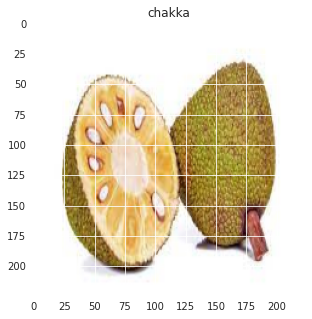

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
9/9 [==============================] - 1s 56ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.6345 - val_accuracy: 0.7500
Epoch 2/500
9/9 [==============================] - 0s 45ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.6304 - val_accuracy: 0.7500
Epoch 3/500
9/9 [==============================] - 0s 44ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6317 - val_accuracy: 0.7500
Epoch 4/500
9/9 [==============================] - 0s 44ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.6446 - val_accuracy: 0.7500
Epoch 5/500
9/9 [==============================] - 0s 44ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.6296 - val_accuracy: 0.7500
Epoch 6/500
9/9 [==============================] - 0s 44ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6349 - val_accuracy: 0.7500
Epoch 7/500
9/9 [==============================] - 0s 44ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.6314 - val_accuracy: 0.7500
Epoch 8/500
9/9 [===

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['chakka','manga']))

              precision    recall  f1-score   support

      chakka       0.63      1.00      0.77        22
       manga       1.00      0.57      0.72        30

    accuracy                           0.75        52
   macro avg       0.81      0.78      0.75        52
weighted avg       0.84      0.75      0.74        52



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model.save('model.h5')

In [ ]:
from keras.preprocessing import image

manga


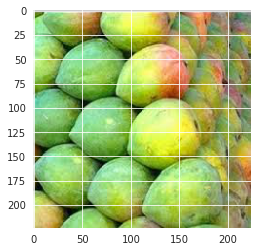

In [ ]:
img3 = image.load_img("train/manga/Copy of images (26).jpg",target_size=(224,224)) ##loading the image
img3 = np.asarray(img3) ##converting to an array
img3 = img3 / 255 ##scaling by doing a division of 255
plt.imshow(img3)
img3 = np.expand_dims(img3, axis=0) ##expanding the dimensions
output = model.predict(img3)
if output[0][0] > output[0][1]:
    print("chakka")
else:
    print('manga')